In [1]:
import numpy as np
import matplotlib.pyplot as plt

from myula import *
from psgla import *
import distributions as pds
import potentials as pot

**Define target density**\
N-D example: Ground truth signal $u_{\text{true}} \in \mathbb{R}^N$. Sample the data $v$ randomly from Pois$(Ku_{\text{true}}+b)$ with some known background $b$ and forward model $K : \mathbb{R}^N \to \mathbb{R}^M$. Then recover $u$ from $v$.
Set $F(u) = \mathrm{KL}(Ku+b,v) = \sum_{i=1}^m (Ku)_i + b_i - v_i + v_i\log\left(\frac{v_i}{(Ku)_i+b_i}\right)$ and the constraint prior $G(u) = \iota_{\mathbb{R}^N_{++}} (u)$.

In [2]:
(M,N) = (2,2)
u_true = np.ones((N,1))
K = 95*np.eye(M,N)
b = 5*np.ones((M,1))
v = np.random.poisson(K@u_true + b)
poisson_dist = pds.Poisson(data=v,background=b,K=K)

((0.0, 1.5), (0.0, 1.5))

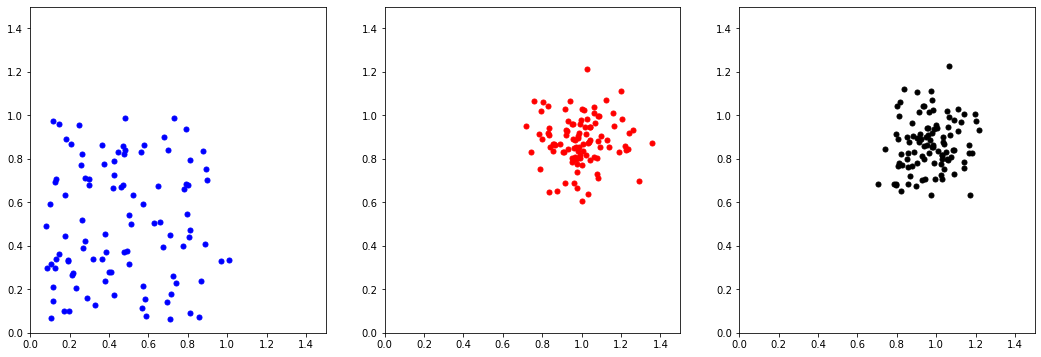

In [10]:
rng = np.random.default_rng()

L = np.sum(v/(b**2)*np.reshape(np.sum(K**2,axis=1),(M,1)))
tau = 1/L
#max_iter = np.round(np.min((100,1/tau))).astype(int)
max_iter = 5
n_samples = 100
x0 = rng.uniform(size=(N,n_samples))

psgla_fixed_step = PSGLA(max_iter, tau, x0, pd = poisson_dist)
x_fixed_step, steps_fixed, sum_steps_fixed = psgla_fixed_step.simulate()

# psgla with backtracking - mean of samples should satisfy descent condition
psgla_backtracking1 = PSGLA(max_iter, -1, x0, pd = poisson_dist)
x_backtracking1, steps_backtracking1, sum_steps_backtracking1 = psgla_backtracking1.simulate()

# psgla with backtracking - all samples should satisfy descent condition
psgla_backtracking2 = PSGLA(max_iter, -2, x0, pd = poisson_dist)
x_backtracking2, steps_backtracking2, sum_steps_backtracking2 = psgla_backtracking2.simulate()

fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].scatter(x_fixed_step[0,:],x_fixed_step[1,:],color='b',s=25)
ax[0].set_xlim([0, 1.5]), ax[0].set_ylim([0,1.5])
ax[1].scatter(x_backtracking1[0,:],x_backtracking1[1,:],color='r',s=25)
ax[1].set_xlim([0, 1.5]), ax[1].set_ylim([0,1.5])
ax[2].scatter(x_backtracking2[0,:],x_backtracking2[1,:],color='k',s=25)
ax[2].set_xlim([0, 1.5]), ax[2].set_ylim([0,1.5])

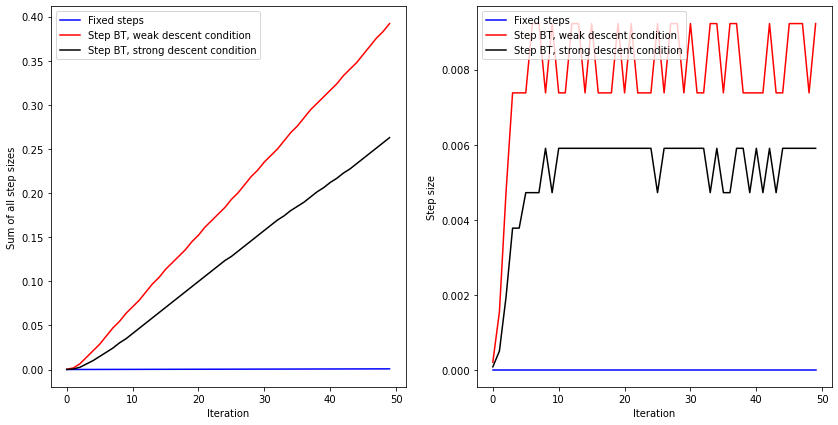

In [8]:
fig, ax = plt.subplots(1,2,figsize = (14,7))
ax[0].plot(np.arange(0,max_iter), sum_steps_fixed,'b-',label='Fixed steps')
ax[0].plot(np.arange(0,max_iter), sum_steps_backtracking1,'r-',label='Step BT, weak descent condition')
ax[0].plot(np.arange(0,max_iter), sum_steps_backtracking2,'k-',label='Step BT, strong descent condition')
ax[0].legend(loc='upper left')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Sum of all step sizes')

ax[1].plot(np.arange(0,max_iter), steps_fixed,'b-',label='Fixed steps')
ax[1].plot(np.arange(0,max_iter), steps_backtracking1,'r-',label='Step BT, weak descent condition')
ax[1].plot(np.arange(0,max_iter), steps_backtracking2,'k-',label='Step BT, strong descent condition')
ax[1].legend(loc='upper left')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Step size');